# Sleap Installation on AppStream (Windows)

This report instructs how to build a Windows image with Sleap package installed via Conda. This report is for Windows Images only.

- [Windows Build Image Instruction](#Windows-Build-Image-Instruction)

## Windows Build Image Instructions

**Image Builder Users**

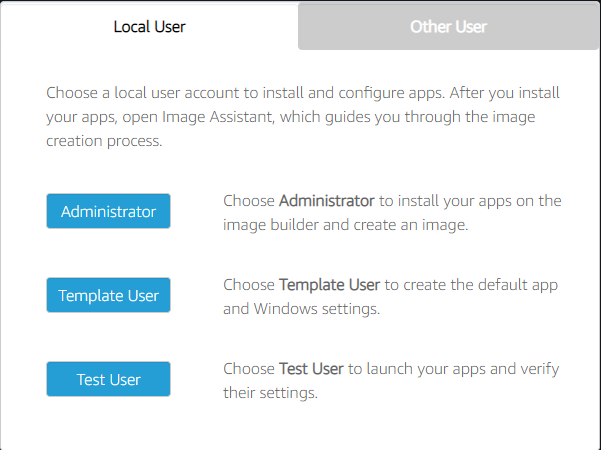

### Steps to follow 

**1. Launch Image builder with GPU support**

Since we want to install Sleap for this demo, we would like to pick an instance type that provides NVIDIA GPU support, so we will be using the latest Graphics G4 Instance family, specifically the `stream.graphics.g4dn.xlarge` instance type which provides the lowest amount of resource (e.g. vCPU, memory). P.S. Graphics G4 resources are limited under a quota by default, so we had to request for a quota increase from AWS. 

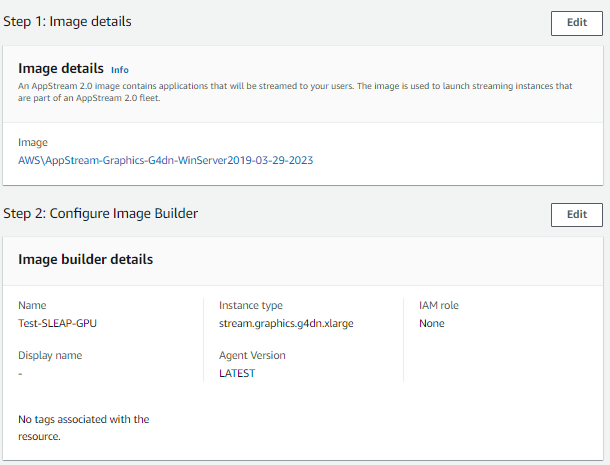

**Reminder 1:** Default internet access is enabled to add Internet access to the image builder's streaming instance.

**Reminder 2:** If you would like to access other AWS services such as S3 in your image builder instanc, you need to attach an IAM role with the corresponding permissions, so that AppStream would create a temporary AWS profile `appstream-machine-role` with those access (e.g. check the [Rclone notebook](./Rclone-Windows-Report.ipynb)). 

**2. (Admin user) Install Apps and Packages**

**How to install Applications:** Open Firefox and download installers for the applications you would like. Launch the installers and follows the instructions.

- **Special instructions for installing Conda:** When launching the Miniconda installer, do NOT use the default install location! Instead, create a new folder called `miniconda3` directly under `:C\` and install Miniconda there. 

<div class="alert alert-block alert-warning">
<b>Beware:</b> Do not install applications under the `C:\Users` folder because other users (e.g. Template and Test users) will not have permissions to access them. This won't be a common issue since typical apps are all installed under `C:\Program Files` or `C:\Program Files (x86)`. <b>Anything that is stored directly under `C:\` should be completed as an Admin User, anything that is stored under `C:\Users\` folder should be completed as a Template User. </b>
</div>

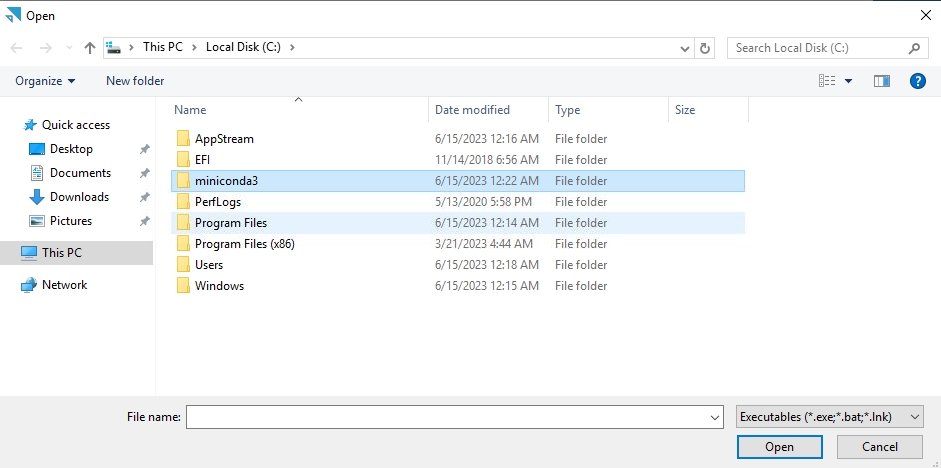

**How to install packages:** Once miniconda has been installed, open the Anaconda Prompt Terminal app from the Windows start menu, and start installing desired packages. 


- **SLEAP installation:** This pose estimation package is installed for the purpose of this demo. For more detailed instructions on installing SLEAp, visit the [SLEAP demo \otebook](./Sleap-Demo.ipynb).

        conda update conda -y
        conda create -n sleap -c sleap -c nvidia -c conda-forge -y sleap=1.3.0 ipykernel
        conda create -n jupyter jupyter=1.0.0 nb_conda_kernels

**3. (Admin User) Add App to Image**

It is tricky for add the Anaconda Prompt as an app since there is no single executable file that would launch it automatically. However, we can work around it by launching the default Windows Command Prompt app and run some conda executable files to setup conda. Here are the configurations that should be entered to successfully add it as an application. 

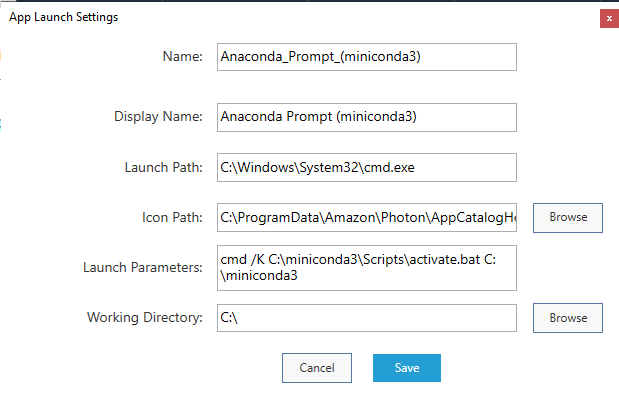

Additionally, you set the SLEAP conda environment to be activated by default by appending ` & conda activate sleap` to the launch parameters. You can also have the terminal app launch the SLEAP GUI immediately by appending ` & conda activate sleap & sleap-label` to the launch parameters. The following steps of this demo continues with the app with the former setting, where the Terminal App has sleap as the default conda environment. 

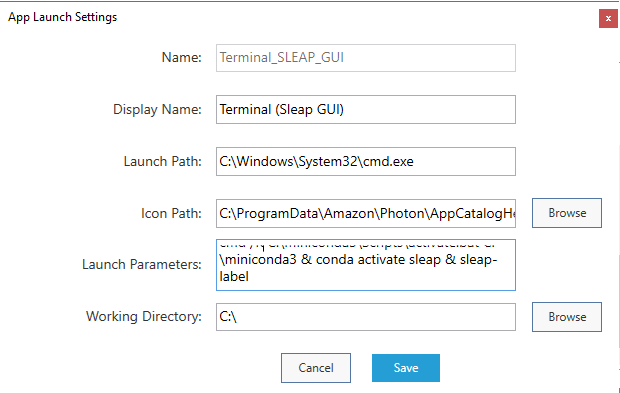

P.S. Here were the steps that I went through to obtain the workaround configurations. First, turn on show hidden files in File Explorer. Then click Add app in Image Assistance, navigate to the Start Menu shortcut of Anaconda Prompt and select the shortcut. (`C:\Users\ImageBuilderAdmin\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Miniconda3 (64-bit)`, or Google how to show hidden files and where the Start Menu shortcut is located if needed.) The following configurations would be generated automatically. Then, change the Launch Parameters and Working directory to match the figure above.

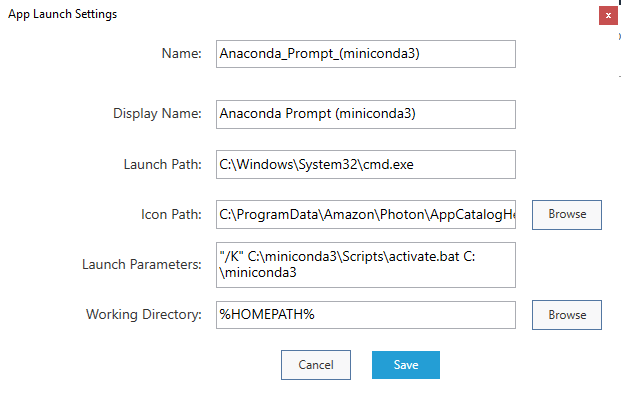

**4. (Template User) Setup default configurations for all users**

**Set environment variable:** For this demo, we set a default environment variable for the AWS profile created by Appstream. This would simplify the work that the users have to do if they wish to access any AWS services (such as the mounting S3 data buckets via [Rclone](./Rclone-Windows-Report.ipynb) for more) because they wouldn't have to worry about entering a profile name everytime. The environment variables may not be immediately available as a Template User, but they will be later as a Test User. 

    setx AWS_PROFILE "appstream_machine_role"
    
**Configure Sleap:** Launch Sleap once let it set up some configuration files (e.g. `.sleap``). 
    
    sleap-label

**Tip**: If during the testing phase or optimization phase, the terminal is trying to load the GUI but nothing shows up, try pressing enter on the keyboad, and the loading messages should appear. 

**5. (Admin User) Save default configureations**

Click "Save Settings".  

**6. (Test User) Test App**

For this demo, we first checked that there is a sleap environment, and checked that the sleap GUI can be opened properly. 

    conda env list
    sleap-label

Check4r that the default AWS profile was set correctly.

    echo %AWS_PROFILE%

**7. (Admin User) Optimize app launch**

(Not sure if this step actually helps improve user instance launch speed) For this demo, I let the Image Assistance launch Anaconda Prompt and then ran the commands to launch the sleap GUI once before continuing to the next app so that AppStream can capture the files it needs to optimize. 

    (base) conda env list
    (base) conda activate sleap
    (sleap) sleap-label
    
**Tip**: If during the testing phase or optimization phase, the terminal is trying to load the GUI but nothing shows up, try pressing enter on the keyboad, and the loading messages should appear. 

**8. (Admin User) Create image**

In image description, you can write down the apps included and its version (Sleap v1.3.0). 